In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
## Display the number of unique mice IDs in the data

len(pymaceuticals_df["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
## Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

pymaceuticals_df.loc[pymaceuticals_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_df = pymaceuticals_df.loc[pymaceuticals_df["Mouse ID"] == "g989", :]
duplicated_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Created a DataFrame with unique Mouse ID
uniquemice_pymaceuticals_df = pd.DataFrame(pymaceuticals_df["Mouse ID"].unique())

uniquemice_pymaceuticals_df.head()

,0
0,b128
1,f932
2,g107
3,a457
4,c819


In [6]:
# drop the duplicated mouse and created a clean DataFrame 
pymaceuticals_clean_df = pymaceuticals_df.loc[pymaceuticals_df["Mouse ID"] != "g989", :]
pymaceuticals_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
## Display the number of unique mice IDs in the clean DataFrame

len(pymaceuticals_clean_df["Mouse ID"].unique())

248

In [8]:
# Generate Summary Statistics

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume_df = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
#mean_tumor_volume_df
median_tumor_volume_df = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

#median_tumor_volume_df
variance_tumor_volume_df = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#variance_tumor_volume_df
std_tumor_volume_df = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#std_tumor_volume_df
sem_tumor_volume_df = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_tumor_volume_df = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_tumor_volume_df

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Create a new DataFrame with all calculations by merging the DataFrames

summary0_statistics_df = pd.merge(mean_tumor_volume_df, median_tumor_volume_df, how="left", on=["Drug Regimen"])
#summary0_statistics_df

renamecols_summary_statistics_df = summary0_statistics_df.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume",
                                                                         "Tumor Volume (mm3)_y":"Median Tumor Volume"
                                                                         })
#renamecols_summary_statistics_df

summary1_statistics_df = pd.merge(variance_tumor_volume_df, std_tumor_volume_df, how="left", on=["Drug Regimen"])
#summary1_statistics_df

renamecols_summary1_statistics_df = summary1_statistics_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Variance",
                                                                         "Tumor Volume (mm3)_y":"Tumor Volume Std.Dev."                                        
                                                                         })
#renamecols_summary1_statistics_df

summary2_statistics_df = pd.merge(renamecols_summary_statistics_df, renamecols_summary1_statistics_df, how="left", on=["Drug Regimen"])
#summary2_statistics_df

summary3_statistics_df = pd.merge(summary2_statistics_df, sem_tumor_volume_df, how="left", on=["Drug Regimen"])
#summary3_statistics_df
summary_statistics_df = summary3_statistics_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std.Err."})
summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_summary_stats_df = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

#advanced_summary_stats_df

advanced_summary_stats_df['sem'] = advanced_summary_stats_df['std'] / np.sqrt(advanced_summary_stats_df['count'])
advanced_summary_stats_df['var'] = pymaceuticals_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
advanced_summary_stats_df


renamed_summary_statistics_df = advanced_summary_stats_df.rename(columns = {"50%":"median"})
adv_summary_statistics_df = renamed_summary_statistics_df[["mean", "median","var","std","sem" ]]
adv_summary_statistics_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# use the DataFrame advanced_summary_stats_df which has the count of Mouse ID/Timepoints
advanced_summary_stats_df
# sort by timepoints
advanced_summary_stats_df = advanced_summary_stats_df.astype({"count": int}, errors='raise')
sorted_by_count_df = advanced_summary_stats_df.sort_values(["count"],ascending=False)
sorted_by_count_df

,count,mean,std,min,25%,50%,75%,max,sem,var
Drug Regimen,,,,,,,,,,
Capomulin,230,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346,24.947764
Ramicane,228,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955,23.486704
Ketapril,188,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860,68.553577
Naftisol,186,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466,66.173479
Zoniferol,182,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432,0.516398,48.533355
Placebo,181,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331,61.168083
Stelasyn,181,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111,59.450562
Ceftamin,178,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821,39.290177
Infubinol,178,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236,43.128684


In [12]:
## a bar plot using Pandas

# Filter the DataFrame down only to those columns to chart
drug_observations = sorted_by_count_df[["count"]]
drug_observations

,count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


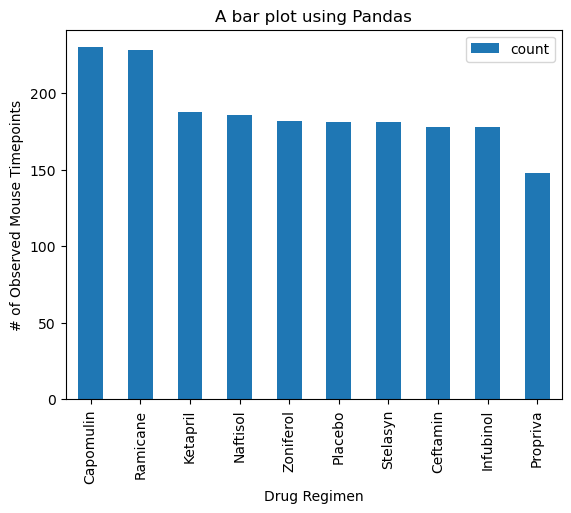

In [13]:
# Use DataFrame.plot() in order to create a bar chart of the data
figure = drug_observations.plot(kind="bar")

# Set a title for the chart
figure.set_title("A bar plot using Pandas")
figure.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

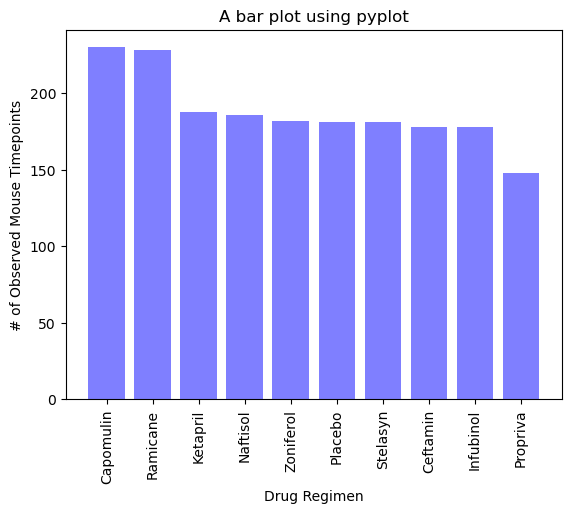

In [14]:
## a bar plot above using pyplot

x_axis = np.arange(len(advanced_summary_stats_df))
x_axis

y_axis = sorted_by_count_df["count"]
y_axis

plt.bar(x_axis, y_axis, color='blue', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", 
                            "Ramicane", 
                            "Ketapril", 
                            "Naftisol", 
                            "Zoniferol",
                            "Placebo",
                            "Stelasyn",
                            "Ceftamin",
                            "Infubinol",
                            "Propriva",
                           ],  rotation ="vertical")

plt.title("A bar plot using pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pymaceuticals_clean_df["Sex"].count()

number_by_sex = pymaceuticals_clean_df["Sex"].value_counts()
number_by_sex

Male      958
Female    922
Name: Sex, dtype: int64

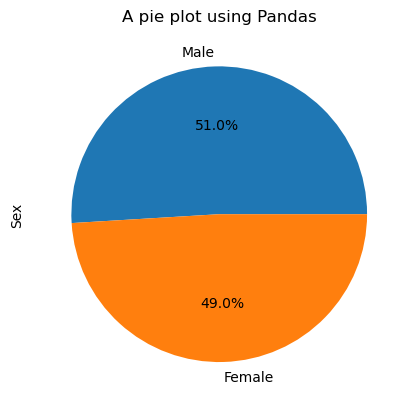

In [16]:

# Use DataFrame.plot() in order to create a pie chart of the data
figure = number_by_sex.plot(kind="pie", autopct="%1.1f%%")

# Set a title for the chart
figure.set_title("A pie plot using Pandas")
figure.set_ylabel("Sex")
plt.show()

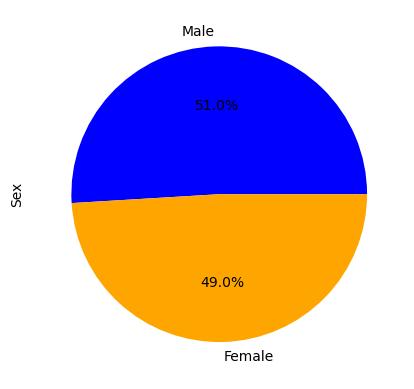

In [17]:
# Generate the above pie plot using Pyplot

labels = ["Male", "Female"]
sizes = [958, 922]
colours = ["blue", "orange"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colours, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.savefig("PySexPies.png")
plt.show()

In [18]:
# Calculate Quartiles, find outliers and create a box plot

## Create a DataFrame that has the last timepoint for each mouse ID using groupby. 

max_timepoint_df = pymaceuticals_clean_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df

## reset the index of the DataFrame
max_timepoint_df.reset_index(drop=False)

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [23]:
## Merge this new DataFrame with the original cleaned DataFrame
merged_max_timepoint_df = pd.merge(max_timepoint_df, pymaceuticals_clean_df, how="left", on=["Mouse ID", "Timepoint"])
#merged_max_timepoint_df.count()

# only keep the columns needed

max_timepoint_plt_df = merged_max_timepoint_df[["Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
#max_timepoint_plt_df

#Put the four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, in a list.

treatment_groups = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatment_groups

# Create an empty list to fill with tumor volume data .

final_tumor_volume = []

# Create an empty DataFrame to hold all the located treatment results for the four groups
#treatment_df = pd.DataFrame()

# Use the loop function to display the IQR and the outliers for each treatment group (serie)
for treatment in treatment_groups:
    treatment_df = pd.DataFrame()
    series_df = max_timepoint_plt_df.loc[max_timepoint_plt_df["Drug Regimen"]==treatment]
    treatment_df = treatment_df.append(series_df)
    final_tumor_volume.append(treatment_df['Tumor Volume (mm3)'])

    quartiles = treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_df.loc[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{treatment}'s IQR: {iqr}")
    #print(f"{treatment}'s lower_bound: {lower_bound}")
    #print(f"{treatment}'s upper_bound: {upper_bound}")
    print(f"{treatment}'s potential outliers: {outliers['Tumor Volume (mm3)']}")

Capomulin's IQR: 7.781863460000004
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's IQR: 9.098536719999998
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's IQR: 11.477135160000003
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's IQR: 15.577752179999997
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


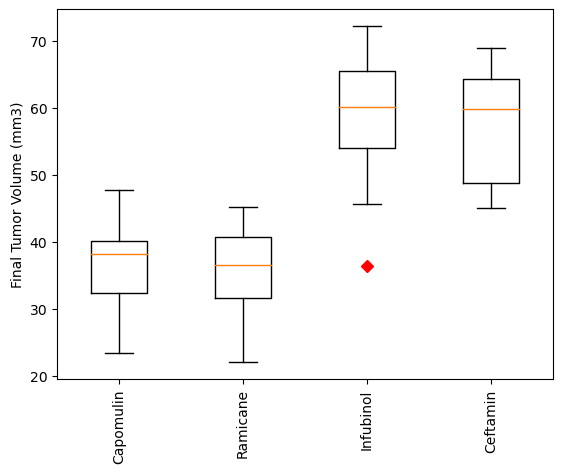

In [24]:
# Use a box plot to show the distribution of the final tumor volume for all the mice in each treatment group.
x_axis = [1,2,3,4]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
#ax1.boxplot(final_tumor_volume)
ax1.boxplot(final_tumor_volume, 0, 'rD')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", 
                            "Ramicane", 
                            "Infubinol",
                            "Ceftamin",
                           ],  rotation ="vertical")
plt.show()

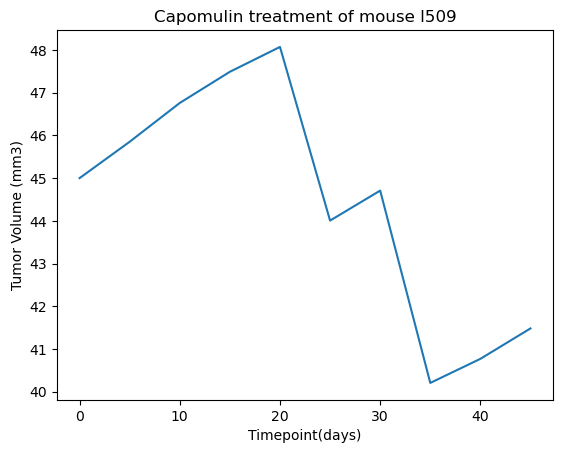

In [25]:
# Random select one mouse treated with Capomulin and generate a line plot to show the tumor volume vs. time point
# locate all observations treated with Capomulin
capomulin_df = pymaceuticals_clean_df.loc[pymaceuticals_clean_df["Drug Regimen"]=="Capomulin"]
capomulin_df["Mouse ID"].value_counts()

# select the mouse l509 to be comparable with the plot in the starter file provided
l509_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="l509"]
l509_df

# generate a line plot to show the tumor volume vs. time point for l509
x_axis = l509_df["Timepoint"]
y_axis = l509_df["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

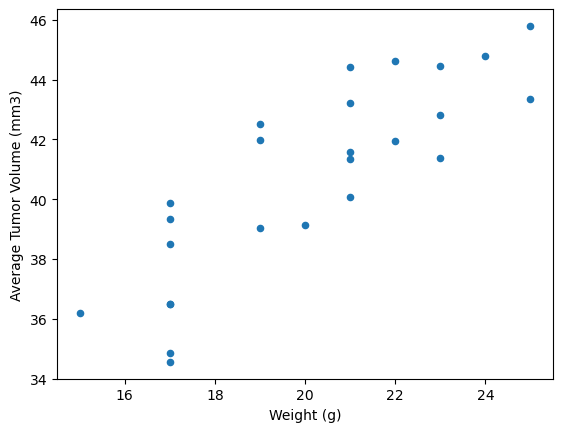

In [26]:
# Generate a scatter plot is to show average tumor volume vs. mouse weight for the Capomulin regimen.

average_tumor_volume_df = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_volume_df.count()
average_mouse_weight_df = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
average_mouse_weight_df
merged_average_df = pd.merge(average_mouse_weight_df, average_tumor_volume_df, on="Mouse ID", how="outer")
merged_average_df = merged_average_df.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
merged_average_df

merged_average_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)")
plt.show()



In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x = merged_average_df["Weight (g)"]
y = merged_average_df["Average Tumor Volume (mm3)"]
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [28]:
# Generate the regression equation

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

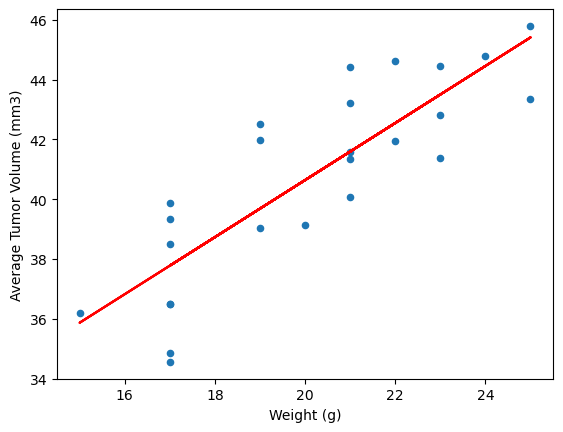

In [29]:
# Add the linear regression line to the previous scatter plot
merged_average_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)")

# add the regression line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.plot(x,regress_values,"r-")
plt.show()